In [256]:
import numpy as np
import pyaudio
import wave
import matplotlib.pyplot as plt
import struct
from scipy.io import wavfile
import os
from sklearn.neural_network import MLPClassifier
import pandas as pd

420000


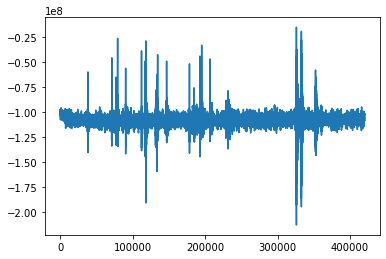

In [66]:
samplerate, data = wavfile.read('./training/lid_off_full_run_1.wav')

#plt.plot(data)

data = data[60000:]

plt.plot(data)

print(data.size)

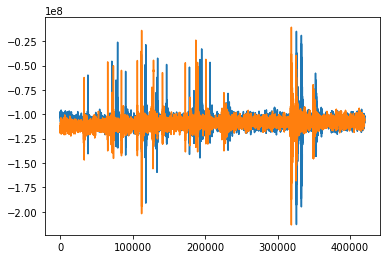

In [67]:
samplerate2, data2 = wavfile.read('./training/lid_off_full_run_2.wav')

#plt.plot(data)

data2 = data2[60000:]

plt.plot(data)
plt.plot(data2)


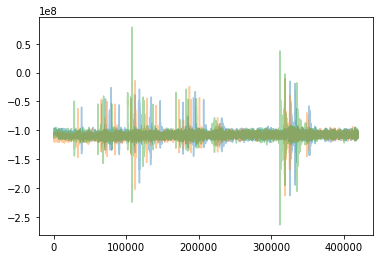

In [69]:
samplerate3, data3 = wavfile.read('./training/lid_off_full_run_3.wav')

data3 = data3[60000:]

plt.plot(data,  alpha=0.4)
plt.plot(data2, alpha=0.4)
plt.plot(data3, alpha=0.4)


-14974976
65437696
-10747904
78430208
69517312
-15237120
14827520
-23298048
-4669440
-10272768


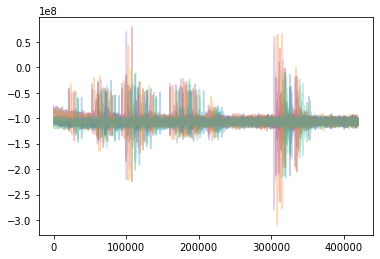

In [95]:

for item in os.listdir("./training"):
    if item[0:7] == "lid_off":
        samplerate, data = wavfile.read(f'./training/{item}')
        data = data[60000:]
        print(max(data))
        plt.plot(data, alpha=0.3)

419


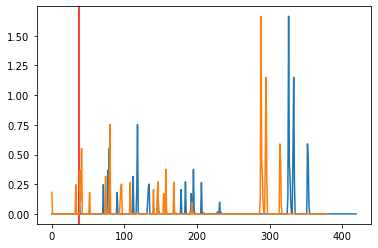

In [159]:
samplerate, data = wavfile.read('./training/lid_off_full_run_1.wav')

#plt.plot(data)

data = data[60000:]

data = (data - data.mean()) / data.std()

data[data < 3] = 0



width = 1000
data = data[:(data.size // width) * width].reshape(-1, width).mean(axis=1)

first_peak = -1

for i in range(data.size):
    if( data[i] != 0 and first_peak == -1):
        first_peak = i
print(i)

plt.plot(data)
plt.axvline(x=first_peak, color="r")


data = data[first_peak:]
        
plt.plot(data)

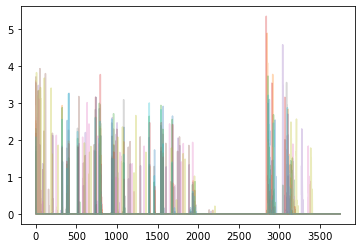

In [194]:

for item in os.listdir("./training"):
    if item[0:7] == "lid_off":
        samplerate, data = wavfile.read(f'./training/{item}')
        # trim first 60k samples (shortly after clap)
        data = data[60000:]
        # mean center and scale data
        data = (data - data.mean()) / data.std()
        # filter out all ambient noise (works for this application)
        data[data < 3] = 0
        
        # compresses data into bins to reduce dimentionality, works great after filter
        width = 100
        data = data[:(data.size // width) * width].reshape(-1, width).mean(axis=1)
        
        # looks at the data for the first non-zero value (first peak in wave)
        first_peak = -1
        for i in range(data.size):
            if( data[i] != 0 and first_peak == -1):
                first_peak = i
        #trim from first peak onwards to end (sound runs long anways)
        data = data[first_peak:]
        
        # trims from end to have normalized size, scaled by width to accomidate different binning
        data = data[:int(3750_00/width)]
        plt.plot(data, alpha=0.3)
        #plt.axvline(x=first_peak, color="r")
plt.show()

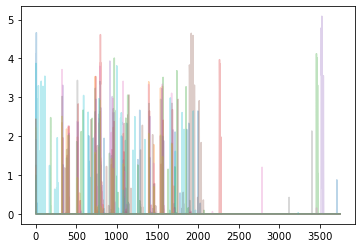

In [196]:

for item in os.listdir("./training"):
    if item[0:7] == "lid_on_":
        samplerate, data = wavfile.read(f'./training/{item}')
        # trim first 60k samples (shortly after clap)
        data = data[60000:]
        # mean center and scale data
        data = (data - data.mean()) / data.std()
        # filter out all ambient noise (works for this application)
        data[data < 3] = 0
        
        # compresses data into bins to reduce dimentionality, works great after filter
        width = 100
        data = data[:(data.size // width) * width].reshape(-1, width).mean(axis=1)
        
        # looks at the data for the first non-zero value (first peak in wave)
        first_peak = -1
        for i in range(data.size):
            if( data[i] != 0 and first_peak == -1):
                first_peak = i
        #trim from first peak onwards to end (sound runs long anways)
        data = data[first_peak:]
        
        # trims from end to have normalized size, scaled by width to accomidate different binning
        data = data[:int(3750_00/width)]
        plt.plot(data, alpha=0.3)
        #plt.axvline(x=first_peak, color="r")
plt.show()

In [260]:
def get_data(rel_dir):
    width = 1000
    trim_value = 3750_00
    x = []
    y = []
    
    for item in os.listdir(rel_dir):
        if item[0:7] == "lid_off" or item[0:15] == "testing_lid_off":
            y.append(0)
            samplerate, data = wavfile.read(f'{rel_dir}/{item}')
            # trim first 60k samples (shortly after clap)
            data = data[60000:]
            # mean center and scale data
            data = (data - data.mean()) / data.std()
            # filter out all ambient noise (works for this application)
            data[data < 3] = 0

            # compresses data into bins to reduce dimentionality, works great after filter
            data = data[:(data.size // width) * width].reshape(-1, width).mean(axis=1)

            # looks at the data for the first non-zero value (first peak in wave)
            first_peak = -1
            for i in range(data.size):
                if( data[i] != 0 and first_peak == -1):
                    first_peak = i
            #trim from first peak onwards to end (sound runs long anways)
            data = data[first_peak:]

            # trims from end to have normalized size, scaled by width to accomidate different binning
            data = data[:int(trim_value/width)]
            x.append(data)
            #plt.plot(data, alpha=0.3)
            #plt.axvline(x=first_peak, color="r")
        elif item[0:7] == "lid_on_" or item[0:15] == "testing_lid_on_":
            y.append(1)
            samplerate, data = wavfile.read(f'{rel_dir}/{item}')
            # trim first 60k samples (shortly after clap)
            data = data[60000:]
            # mean center and scale data
            data = (data - data.mean()) / data.std()
            # filter out all ambient noise (works for this application)
            data[data < 3] = 0

            # compresses data into bins to reduce dimentionality, works great after filter
            data = data[:(data.size // width) * width].reshape(-1, width).mean(axis=1)

            # looks at the data for the first non-zero value (first peak in wave)
            first_peak = -1
            for i in range(data.size):
                if( data[i] != 0 and first_peak == -1):
                    first_peak = i
            #trim from first peak onwards to end (sound runs long anways)
            data = data[first_peak:]

            # trims from end to have normalized size, scaled by width to accomidate different binning
            data = data[:int(trim_value/width)]
            x.append(data)
            #plt.plot(data, alpha=0.3)
            #plt.axvline(x=first_peak, color="r")
    plt.show()
    x = np.array(x)
    y = np.array(y)
    return x, y

In [262]:
x, y = get_data("./training")

nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(26,), random_state=1) #hidden_layer_sizes=(?,)
nn.fit(x,y);

xt, yt = get_data("./testing")


pred =  nn.predict(xt)

print(pd.crosstab(yt, pred))


col_0  0  1
row_0      
0      9  1
1      1  9


In [246]:
def get_data_by_state(lid_status, rel_dir): # lid_status = "lid_off" for off, or "lid_on_" for on data
    width = 1000
    trim_value = 3750_00
    x = []
    if lid_status == "lid_off":
        y = np.zeros(10)
    else:
        y = np.ones(10)
    
    for item in os.listdir(rel_dir):
        if item[0:7] == lid_status:
            samplerate, data = wavfile.read(f'{rel_dir}/{item}')
            # trim first 60k samples (shortly after clap)
            data = data[60000:]
            # mean center and scale data
            data = (data - data.mean()) / data.std()
            # filter out all ambient noise (works for this application)
            data[data < 3] = 0

            # compresses data into bins to reduce dimentionality, works great after filter
            data = data[:(data.size // width) * width].reshape(-1, width).mean(axis=1)

            # looks at the data for the first non-zero value (first peak in wave)
            first_peak = -1
            for i in range(data.size):
                if( data[i] != 0 and first_peak == -1):
                    first_peak = i
            #trim from first peak onwards to end (sound runs long anways)
            data = data[first_peak:]

            # trims from end to have normalized size, scaled by width to accomidate different binning
            data = data[:int(trim_value/width)]
            x.append(data)
            plt.plot(data, alpha=0.3)
            #plt.axvline(x=first_peak, color="r")
    plt.show()
    x = np.array(x)
    return x, y

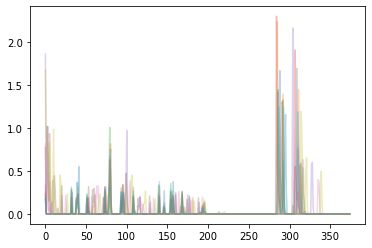

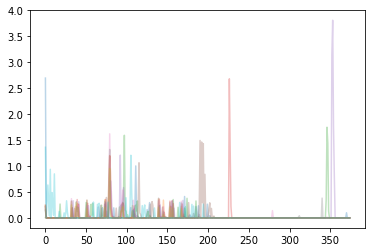

In [250]:
x1, y1 = get_data_by_state("lid_off", "./training")
x2, y2 = get_data_by_state("lid_on_", "./training")
